In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Búsqueda en espacios continuos
Inteligencia Artificial - Facundo A. Lucianna - CEIA - FIUBA

Cuando enfrentamos problemas en espacios continuos, los algoritmos que hemos discutido se vuelven prácticamente inaplicables sin algún tipo de discretización. Las excepciones son el **gradiente descendente (o ascendente)** y el **simulated annealing**, que pueden adaptarse de la siguiente manera:

- Se calcula el gradiente utilizando herramientas de cálculo en varias variables.
- Si la función es muy compleja o imposible de derivar analíticamente, se pueden utilizar métodos numéricos para aproximar el gradiente.
- Para aplicar algún método estocástico, podemos calcular la derivada direccional (o una variante) mediante métodos numéricos.
- Con la derivada direccional, podemos aplicar **simulated annealing**.

Para esta búsqueda, utilizaremos la [función de Himmelblau](https://en.wikipedia.org/wiki/Himmelblau%27s_function). Esta función se emplea comúnmente para probar algoritmos de optimización debido a su forma característica. La expresión matemática de la función de Himmelblau en dos variables *x* e *y* es la siguiente:

$$f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$$

Esta función tiene un máximo local en `(-0.270845, -0.923039)`, que se comporta como un valle, lo que hace que una búsqueda de mínimos pueda caer en esa zona. Además, posee cuatro mínimos globales de igual valor en los puntos `(3, 2)`, `(-2.8505118, 3.131312)`, `(-3.779310, -3.283186)` y `(3.584428, -1.848126)`.

Definamos la función en Python:

In [2]:
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

Visualicemos gráficamente la función, con sus mínimos y máximos:

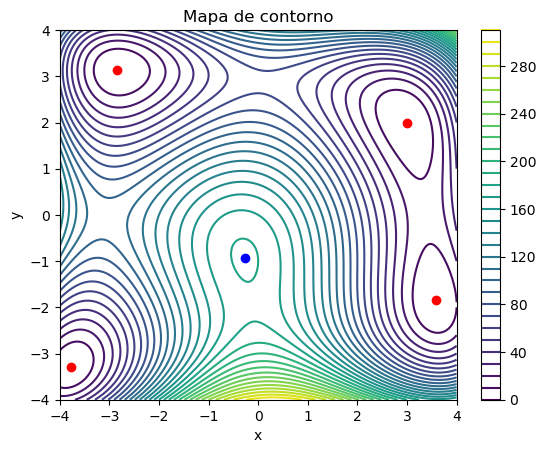

In [3]:
x = np.linspace(-4, 4, 1000)
y = np.linspace(-4, 4, 1000)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

plt.contour(X, Y, Z, levels=30) 
plt.colorbar() 
# Graficamos los mínimos
plt.scatter([3, -2.8505118, -3.779310, 3.584428], [2, 3.131312, -3.283186, -1.848126], color='red')
# Y el máximo
plt.scatter(-0.270845, -0.923039, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mapa de contorno')
plt.show()

Grafiquemos ahora en 3D:

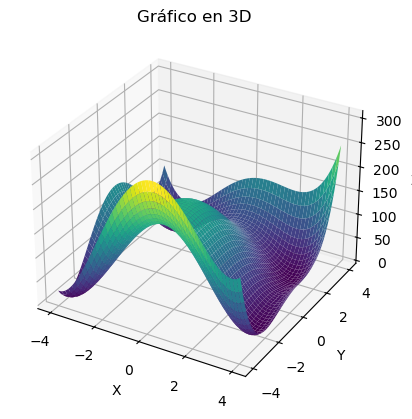

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficamos la superficie
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Gráfico en 3D')
plt.show()

## Gradiente descendente usando el gradiente calculado

Comencemos aplicando el gradiente descendente a la función de Himmelblau:

$$\nabla f = \left( \frac{\partial f}{\partial x},  \frac{\partial f}{\partial y} \right) = \left( 4x(x^2 + y - 11) + 2(x + y^2 - 7), 2(x^2 + y - 11) + 4y(x + y^2 - 7) \right)  $$

Ahora traslademos el gradiente a una función en Python:

In [5]:
def grad_himmelblau(x, y):
    return 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7), 2*(x**2 + y - 11) + 4*y*(x + y**2 - 7)

Con esto, vamos a usar **gradiente descendente**. Para ello, empleamos la siguiente fórmula:

$$ X_{new} = X - \alpha \nabla f(X) $$

Este método requiere definir el valor de $\alpha$ (tasa de aprendizaje). En este caso, utilizaremos un valor constante, aunque también se pueden aplicar variantes, como comenzar con un valor alto (para dar pasos iniciales grandes) e ir disminuyéndolo gradualmente.

Una diferencia importante respecto a los métodos discretos es que, en espacios continuos, el algoritmo no puede terminar cuando el gradiente es exactamente cero, ya que esto es prácticamente imposible debido a los errores numéricos. Por lo tanto, nuestra implementación finaliza si el módulo del gradiente es menor a `1e-12`.

In [6]:
alpha = 0.005

max_iteration = 1000

# Iniciamos en un punto específico a modo didáctico, pero en general se parte desde un valor al azar.
x_new = -2.4169722739821795 
y_new = -2.3589966623281526
f_new = himmelblau(x_new, y_new)

evolution_pos = [(x_new, y_new)]
evolution_value = [f_new]

for iteration in range(max_iteration):
    
    # Calculamos el gradiente en el punto
    delta_x, delta_y = grad_himmelblau(x_new, y_new)
    
    # Avanzamos en la dirección opuesta al gradiente
    x_new -= alpha*delta_x
    y_new -= alpha*delta_y
    f_new = himmelblau(x_new, y_new)
    
    evolution_pos.append((x_new, y_new))
    evolution_value.append(f_new)

    # Terminamos si el módulo del gradiente no varía más
    if np.sqrt(delta_x**2 + delta_y**2) < 1e-12:
        break
        
print(f"Un mínimo se encuentra en {(x_new, y_new)}")
print(f"Se alcanzó en {iteration} iteraciones")

Un mínimo se encuentra en (-3.779310253377743, -3.283185991286163)
Se alcanzó en 77 iteraciones


Grafiquemos la evolución del algoritmo de gradiente. En el siguiente diagrama de contorno, observamos cómo el punto inicial desciende hasta uno de los mínimos. El color del círculo indica el tiempo: azul al principio, rojo al final.

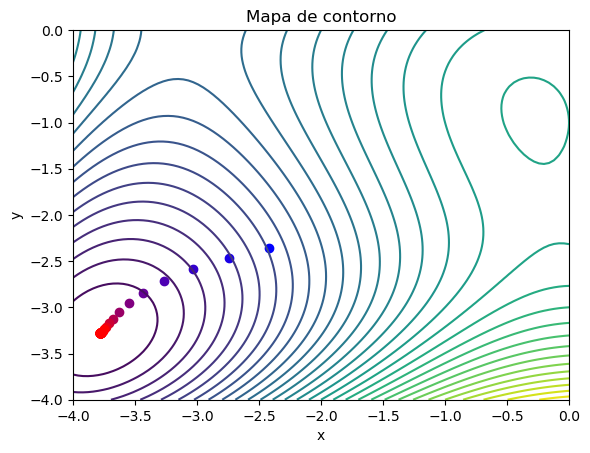

In [7]:
x = np.linspace(-4, 0, 100)
y = np.linspace(-4, 0, 100)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

color_dem = 10

plt.contour(X, Y, Z, levels=30) 
for index, search_coords in enumerate(evolution_pos):
    color=(index/color_dem, 0, (color_dem - index)/color_dem)
    if index > 10:
        color = (1, 0, 0)
    plt.scatter(search_coords[0], search_coords[1], color=color)
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mapa de contorno')
plt.show()

El problema es que, en algunos casos, no podemos calcular el gradiente de forma directa. En esos casos, utilizamos un método aproximado.

Vamos a estimar las derivadas del gradiente utilizando un esquema de diferencias centrales:

In [8]:
def graf_himmelblau_estimated(x, y, delta_x, delta_y):
    
    f_x_up = himmelblau(x + delta_x, y)
    f_x_down = himmelblau(x - delta_x, y)
    
    f_y_up = himmelblau(x, y + delta_y)
    f_y_down = himmelblau(x, y - delta_y)
    
    # Calculamos la derivada parcial para cada variable usando diferencias centrales
    return (f_x_up - f_x_down) / 2*delta_x, (f_y_up - f_y_down) / 2*delta_y

In [9]:
alpha = 0.5

max_iteration = 1000

# Iniciamos en un punto específico a modo didáctico, pero en general se parte desde un valor al azar.
x_new = -2.4169722739821795 
y_new = -2.3589966623281526

delta_x_upwind = 0.1
delta_y_upwind = 0.1

f_new = himmelblau(x_new, y_new)

evolution_pos = [(x_new, y_new)]
evolution_value = [f_new]

for iteration in range(max_iteration):
    
    # Calculamos el gradiente en el punto
    delta_x, delta_y = graf_himmelblau_estimated(x_new, y_new, delta_x_upwind, delta_y_upwind)
    
    # Nos movemos en la dirección contraria al gradiente
    x_new -= alpha*delta_x
    y_new -= alpha*delta_y
    f_new = himmelblau(x_new, y_new)
    
    evolution_pos.append((x_new, y_new))
    evolution_value.append(f_new)
    
    # Terminamos si el módulo del gradiente es suficientemente pequeño
    if np.sqrt(delta_x**2 + delta_y**2) < 1e-12:
        break
            
print(f"Un mínimo se encuentra en {(x_new, y_new)}")
print(f"Se alcanzó en {iteration} iteraciones")

Un mínimo se encuentra en (-3.7775075065187442, -3.2811196886926344)
Se alcanzó en 67 iteraciones


Grafiquemos la evolución del algoritmo de gradiente. En el siguiente diagrama de contorno, se observa cómo el punto inicial desciende hasta uno de los mínimos. El color del círculo indica el paso del tiempo: azul al principio, rojo al final.

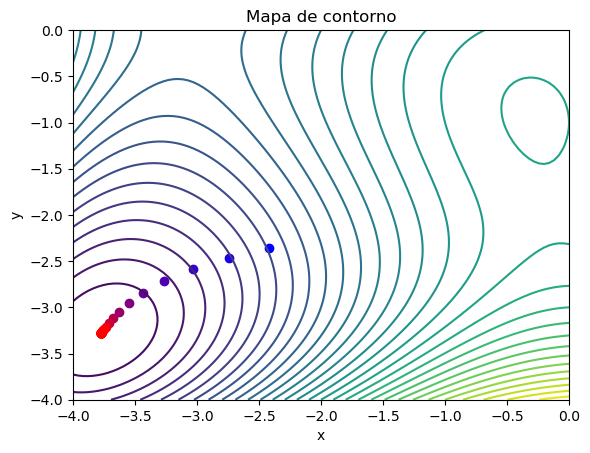

In [10]:
x = np.linspace(-4, 0, 100)
y = np.linspace(-4, 0, 100)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

color_dem = 10

plt.contour(X, Y, Z, levels=30)
for index, search_coords in enumerate(evolution_pos):
    color=(index/color_dem, 0, (color_dem - index)/color_dem)
    if index > 10:
        color = (1, 0, 0)
        
    plt.scatter(search_coords[0], search_coords[1], color=color)
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mapa de contorno')
plt.show()

> ⚠️ **Nota**: Se deja como ejercicio la implementación de la derivada direccional y, en consecuencia, la del gradiente descendente estocástico o la del método de simulated annealing.